<a href="https://colab.research.google.com/github/AyoAjani05/WeRateDogs/blob/main/ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the next nigerian Presidential Election using keywords to scrape data from Nairaland

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
import zipfile #getting the data from a zip file

with zipfile.ZipFile("drive/MyDrive/Nairaland Politics/Politics 40.zip", 'r') as file:
  file.extractall()

# for ayo

```
import zipfile #getting the data from a zip file

with zipfile.ZipFile("drive/folders/1G4HGO65JtjI3r1AYltw66yV8K7PpGt4b/Politics 40.zip", 'r') as file:
  file.extractall()
```
#honour jesus you will have to supply the path from your drive

from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files 
uploaded = files.upload()
# what are you uploading?

In [1]:
#IMPORTING THE LIBRARIES
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from string import punctuation
from nltk.tokenize import TweetTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
%%time
scrape = pd.read_parquet("Politics 40.parquet")
scrape.head(2)

CPU times: user 2.28 s, sys: 1.06 s, total: 3.34 s
Wall time: 2.31 s


,Title,Text,Text_link,Username,Post,Views,Date_joined,Date_posted,Cleaned_Text,Vader_Sentiment,TextBlob_Sentiment
0,"It's A Lie, Emefiele Is Still In His Office Wo...","The Central Bank Of Nigeria, CBN has refuted\n...",https://www.nairaland.com/5060082/lie-emefiele...,hinwazaka,84,28426,2015-07-18,2019-03-04 17:58:00,"The Central Bank Of Nigeria, CBN has refuted c...",Negative,Positive
1,Asiwaju Tinubu Explained The Rumor Against Aji...,The National leader of the All Progressives Co...,https://www.nairaland.com/5061375/asiwaju-tinu...,Adekkatv,1,174,2018-12-21,2019-03-05 23:23:00,The National leader of the All Progressives Co...,Positive,Positive


DATA CLEANING

In [3]:
def Post_selector(string="buhari", data=scrape, column1 = 'Title', column2='Cleaned_Text', case=False):
    df = data[(data[column1].str.contains(string, case=case) | data[column2].str.contains(string, case=case))].reset_index(drop=True)
    return df

In [4]:
buhari = Post_selector()
buhari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41717 entries, 0 to 41716
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               41717 non-null  object        
 1   Text                41717 non-null  object        
 2   Text_link           41717 non-null  object        
 3   Username            41717 non-null  object        
 4   Post                41717 non-null  int64         
 5   Views               41717 non-null  int64         
 6   Date_joined         41717 non-null  datetime64[ns]
 7   Date_posted         41717 non-null  datetime64[ns]
 8   Cleaned_Text        41717 non-null  object        
 9   Vader_Sentiment     41717 non-null  object        
 10  TextBlob_Sentiment  41717 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 3.5+ MB


In [5]:
#@title 
def Sentiment(data= buhari, group=['Year_posted', 'Vader_Sentiment'], column='Title', ratio=False):
    Sentiment_Count = data.groupby(group)[column].count()
    if ratio:
        Sentiment_Ratio = Sentiment_Count/ data.groupby(group[0])[column].count()
    else:
        Sentiment_Ratio = None
    return Sentiment_Count, Sentiment_Ratio

def Date_classifer(new='Year_Joined', data=buhari, column_selected='Date_joined', year=True, plot=True, plot_num=1, 
                   ratio=True, returns=False, legend=(1.15, 0.5), rot=45):
    _data = data.copy()
    if year:
        _data[new] = _data[column_selected].dt.year
        
    Sentiment_Count, Sentiment_Ratio = Sentiment(group=[new, 'Vader_Sentiment'], ratio=ratio, data = _data)
    if plot and plot_num==1:
        sns.barplot(x = new, y= 'Title', hue='Vader_Sentiment', data=Sentiment_Count.reset_index())
        plt.title("Sentiment Count")
        plt.xlabel(new)
        plt.ylabel("Count")
        plt.xticks(rotation=rot)
        plt.legend(bbox_to_anchor=legend)
    elif plot and plot_num==2 and ratio:
        sns.barplot(x = new, y= 'Title', hue='Vader_Sentiment', data=Sentiment_Ratio.reset_index())
        plt.title("Sentiment Count")
        plt.xlabel(new)
        plt.ylabel("Count")
        plt.xticks(rotation=rot)
        plt.legend(bbox_to_anchor=legend)
    if returns:
        value = Sentiment_Count
    else:
        value = None
    return value

EDA (DATA VISUALIZATION)

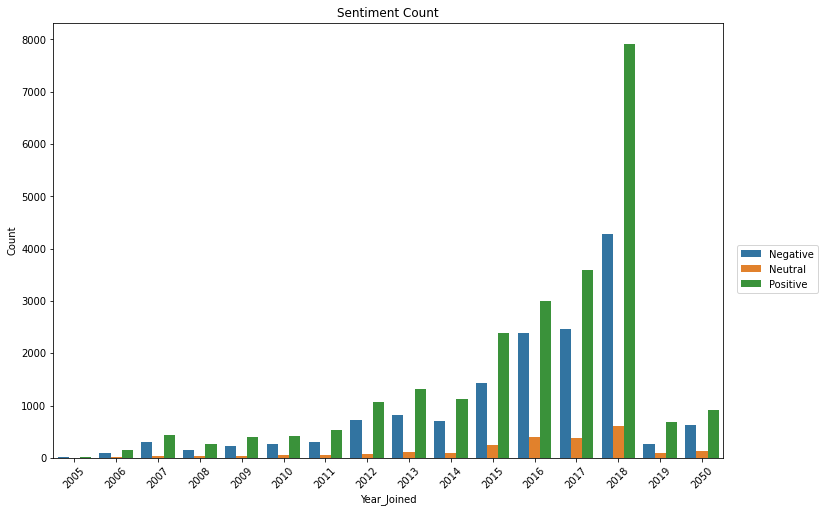

In [6]:
Date_joined_Count = Date_classifer(returns=True)
Date_joined_Count = Date_joined_Count.reset_index()

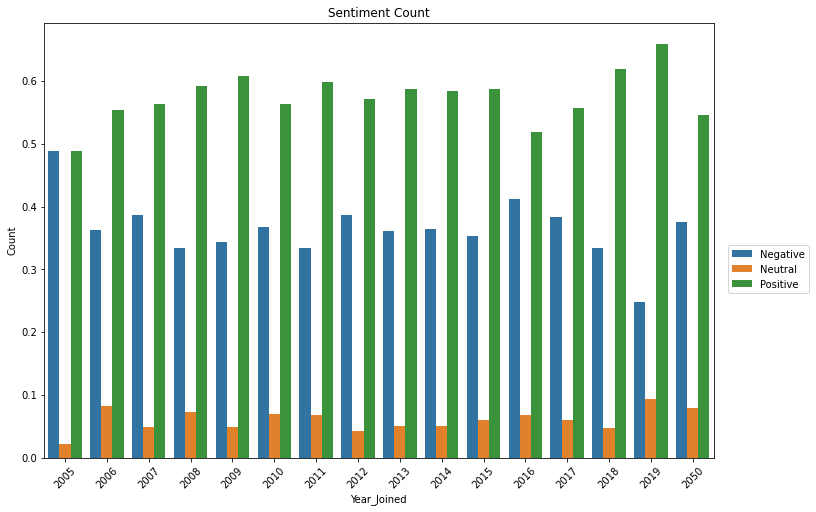

In [7]:
Date_classifer(plot_num=2)

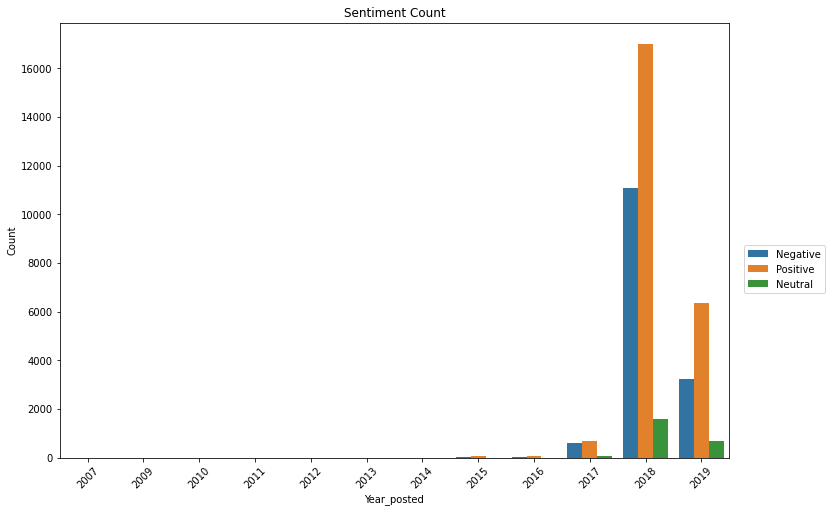

In [8]:
Date_classifer(column_selected='Date_posted', new='Year_posted')

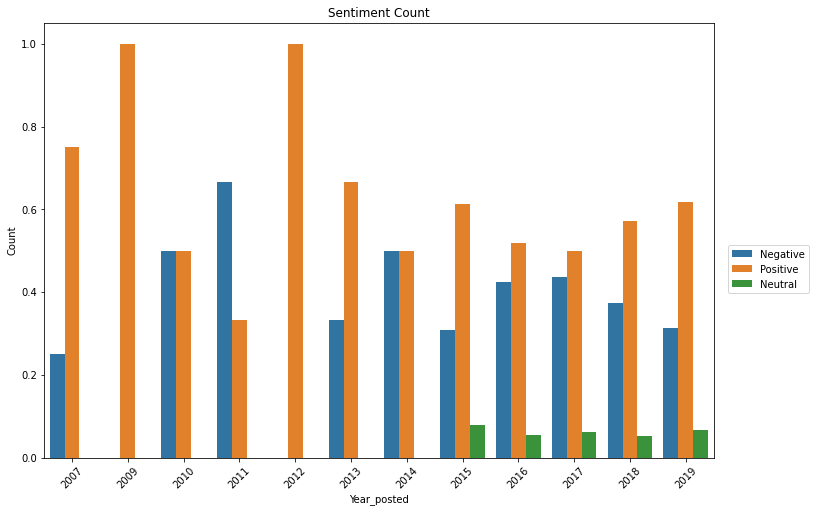

In [9]:
Date_posted_Count = Date_classifer(column_selected='Date_posted', plot_num=2, returns=True, 
                                   new='Year_posted')
Date_posted_Count = Date_posted_Count.reset_index()

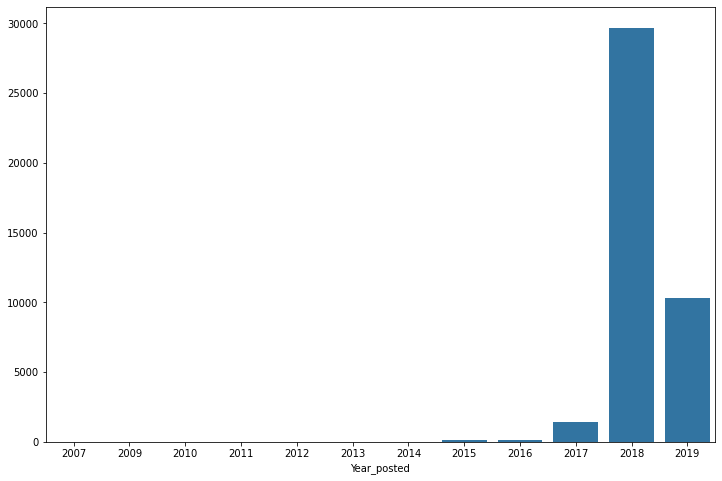

In [10]:
#@title The Year When The Most Posts Were Made.
array = Date_posted_Count.drop(columns='Vader_Sentiment').groupby('Year_posted').Title.sum()
sns.barplot(x=array.index, y=array.values, color=sns.color_palette()[0]);

In [11]:
cum = np.cumsum(array.values)
cum_percent = pd.DataFrame(cum).pct_change().fillna(0).values.reshape(12,)
fig = px.line(x = array.index, y= cum_percent, title="Percentage Increase Per Year (Posts)")
fig.show()

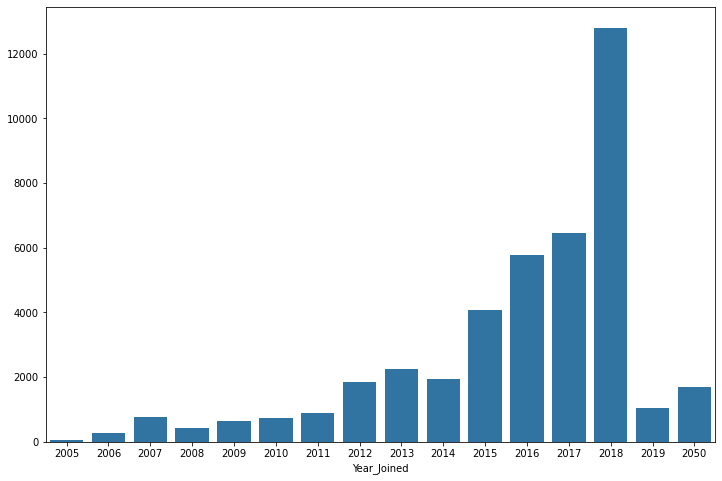

In [12]:
#@title The Year When The Most People Joined Nairaland.
array2 = Date_joined_Count.drop(columns='Vader_Sentiment').groupby("Year_Joined").Title.sum()
sns.barplot(x=array2.index, y=array2.values, color=sns.color_palette()[0]);

In [13]:
cum = np.cumsum(array2.values)
cum_percent = pd.DataFrame(cum).pct_change().fillna(0).values[:15].reshape(15,)
fig = px.line(x = array2.index[:15], y= cum_percent, title="Percentage Increase Per Year")
fig.show()

In [14]:
def Year_selector(data=buhari, column_selected='Date_joined', new='Month_Joined', year=2018, returns=True):
    df = data[(data[column_selected].dt.year == year)].reset_index(drop=True).copy()
    df[new] = df[column_selected].dt.month
    Month = df.groupby([new, 'Vader_Sentiment'])['Title'].count()
    sns.barplot(x = new, y= 'Title', hue='Vader_Sentiment', data=Month.reset_index())
    plt.title("Sentiment Count")
    plt.xlabel(new)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=[1.3, 0.5])
    if returns:
        Month = Month
    else:
        Month = None
    return Month

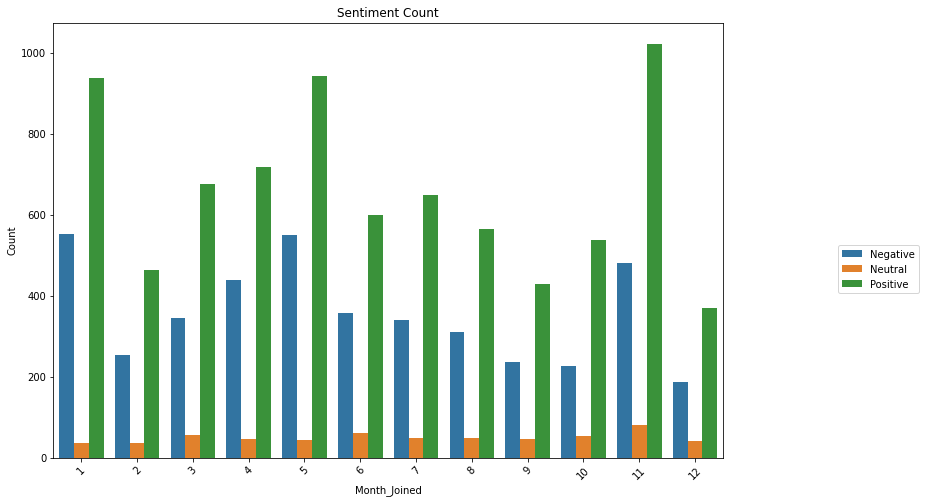

In [15]:
Month_2018 = Year_selector()

In [16]:
Month_2018.head(10)

Month_Joined  Vader_Sentiment
1             Negative           552
              Neutral             37
              Positive           938
2             Negative           254
              Neutral             37
              Positive           465
3             Negative           345
              Neutral             57
              Positive           677
4             Negative           440
Name: Title, dtype: int64

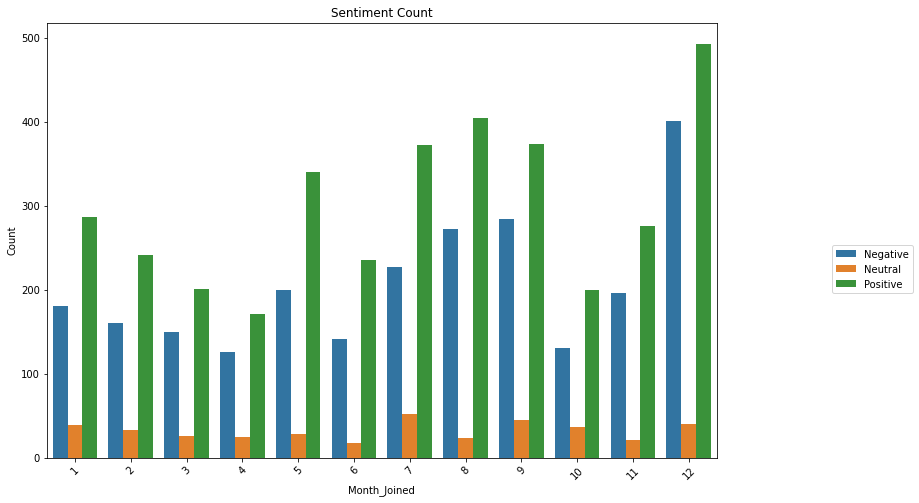

In [17]:
Month_2017 = Year_selector(year=2017)

In [18]:
atiku = Post_selector(string='atiku')
atiku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13415 entries, 0 to 13414
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               13415 non-null  object        
 1   Text                13415 non-null  object        
 2   Text_link           13415 non-null  object        
 3   Username            13415 non-null  object        
 4   Post                13415 non-null  int64         
 5   Views               13415 non-null  int64         
 6   Date_joined         13415 non-null  datetime64[ns]
 7   Date_posted         13415 non-null  datetime64[ns]
 8   Cleaned_Text        13415 non-null  object        
 9   Vader_Sentiment     13415 non-null  object        
 10  TextBlob_Sentiment  13415 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.1+ MB


In [22]:
obi = Post_selector("(^obi | obi | obi[.,/\'\"]+| obi+)")
obi.info()

<ipython-input-3-a3f7c78e33c2>:2: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4673 entries, 0 to 4672
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               4673 non-null   object        
 1   Text                4673 non-null   object        
 2   Text_link           4673 non-null   object        
 3   Username            4673 non-null   object        
 4   Post                4673 non-null   int64         
 5   Views               4673 non-null   int64         
 6   Date_joined         4673 non-null   datetime64[ns]
 7   Date_posted         4673 non-null   datetime64[ns]
 8   Cleaned_Text        4673 non-null   object        
 9   Vader_Sentiment     4673 non-null   object        
 10  TextBlob_Sentiment  4673 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 401.7+ KB


In [ ]:
atiku_sent = Date_classifer(data=atiku, legend=(1.3, 0.5), returns=True)

In [ ]:
atiku_ratio = (atiku.query('Vader_Sentiment == "Positive"| Vader_Sentiment == "Neutral"')\
               .Username.nunique()/ atiku.Username.nunique()) * 100
buhari_ratio = (buhari.query('Vader_Sentiment == "Positive"| Vader_Sentiment == "Neutral"')\
                .Username.nunique()/buhari.Username.nunique()) * 100
obi_ratio = (obi.query('Vader_Sentiment == "Positive"| Vader_Sentiment == "Neutral"')\
             .Username.nunique()/obi.Username.nunique()) * 100    

In [ ]:
print(f'atiku\'s Positivity Ratio: \t{atiku_ratio}')
print(f'buhari\'s Positivity Ratio: \t{buhari_ratio}')
print(f'obi\'s Positivity Ratio: \t{obi_ratio}')

In [ ]:
from sklearn.preprocessing import Normalizer
sc = Normalizer()
atiku['Standard_Views'] = sc.fit_transform(np.array(atiku.Views).reshape(-1, 1))
buhari['Standard_Views'] = sc.fit_transform(np.array(buhari.Views).reshape(-1, 1))
obi['Standard_Views'] = sc.fit_transform(np.array(obi.Views).reshape(-1, 1))

In [ ]:
# buhari_views_normalized = (buhari.groupby('Vader_Sentiment')['Standard_Views']\
#                            .sum()/buhari.count()[0]) * 100
atiku_views_normalized = (atiku.groupby('Vader_Sentiment')['Standard_Views']\
                          .sum()/atiku.count()[0]) * 100
atiku_views_normalized = (obi.groupby('Vader_Sentiment')['Standard_Views']\
                          .sum()/obi.count()[0]) * 100
buhari_views_normalized/ buhari_views_normalized.sum()

In [ ]:
(atiku.groupby('Vader_Sentiment')['Standard_Views'].sum()/atiku.count()[0]) * 100

In [ ]:
(obi.groupby('Vader_Sentiment')['Standard_Views'].sum()/obi.count()[0]) * 100

In [ ]:
%%time
class TitleCleaner:
    def __init__(self, Text, symbols =list('!#$%&()*+-;<=>?@[\\]^_`{|}~…—–'), quotation = ['‘',  '“', '”', '’'],
                token_limit = None, filename="Stopwords.txt"):
        self.text = Text
        self.symbols = symbols
        self.quotation = quotation
        self.token_limit = token_limit
        self.original_length = None
        self.tw = None
        self.filename = filename
        self.processed_words = None
        self.processed_length = None
        
    def Standardize_quote(self, text):
        for item in self.quotation:
            text = text.replace(item, "'")
        for item in self.symbols:
            text = text.replace(item, "")
        return text
        
        
    def Text_cleaner(self, text):
        text = self.Standardize_quote(text)
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])\
                                        |(\w+:\/\/\S+)|(\.{2,})|(\-)|(\w+:\S+)", " ", text).split())
    
    def Applier(self):
        self.text = self.text.apply(lambda x: self.Text_cleaner(x)).str.strip()
        return self.text
    
    def Tokenize(self):
        text = self.Applier()
        if self.token_limit:
            data = ",".join(text.to_list())[:self.token_limit]
        else:
            data = ",".join(text.to_list())
        nlp = TweetTokenizer()
        doc = nlp.tokenize(data)
        self.original_length = len(doc)
        return doc
        
    def Punc_removal(self):
        doc = self.Tokenize()
        Total_words = [str(item).strip() for item in doc if str(item) not in punctuation]
        self.tw = Total_words
        return self.tw
    
    def Words_classes(self):
        Total_words = self.Punc_removal()
        Stopwords = self.Open_file()
        Total_words = [str(word).strip() for word in Total_words if word.lower() not in Stopwords]
        clean_words = pd.Series([str(item).strip() for item in Total_words if \
                                 str(item).isalnum()]).apply(self.exclamation_extractor)
        unprocessed_words = pd.Series([str(item).strip() for item in Total_words \
                                       if not str(item).isalnum()]).apply(self.exclamation_extractor)
        return clean_words, unprocessed_words
    
    def exclamation_extractor(self, text):
        if text[-2:] == "'s":
            text = text[:-2]
        else:
            text = text
        return text
    
    def Open_file(self):
        with open(self.filename) as file:
            text = file.read().split()
        return text
    
    def Word_processing(self):
        clean_words, processed_words = self.Words_classes()
        pass

In [ ]:
%%time
Title = TitleCleaner(scrape.Title)
Title2 = TitleCleaner(scrape.Text)

Text = Title.Words_classes()

In [ ]:
Text[0].value_counts()

In [ ]:
%%time
file = [
  "Abia",
  "Adamawa",
  "Akwa Ibom",
  "Anambra",
  "Bauchi",
  "Bayelsa",
  "Benue",
  "Borno",
  "Cross River",
  "Delta",
  "Ebonyi",
  "Edo",
  "Ekiti",
  "Enugu",
  "FCT - Abuja",
  "Gombe",
  "Imo",
  "Jigawa",
  "Kaduna",
  "Kano",
  "Katsina",
  "Kebbi",
  "Kogi",
  "Kwara",
  "Lagos",
  "Nasarawa",
  "Niger",
  "Ogun",
  "Ondo",
  "Osun",
  "Oyo",
  "Plateau",
  "Rivers",
  "Sokoto",
  "Taraba",
  "Yobe",
  "Zamfara"
]
file = [item.lower() for item in file]
item = '(' + " |".join(file) + ')'

In [ ]:
%%time
states = scrape.Cleaned_Text.str.extractall(item, flags=re.IGNORECASE)
states[0] = states[0].str.lower()
states = states[0].reset_index(drop=True)
states.value_counts()[:5]

In [ ]:
%%time
Cleaned_text = Title2.Applier()
Cleaned_text

In [ ]:
%%time
Cleaned_sent_text = list(Cleaned_text.apply(sent_tokenize))
Cleaned_sent_text = [i for text in Cleaned_sent_text for i in text]
Cleaned_sent_text = pd.Series(Cleaned_sent_text)
Cleaned_sent_text[0]

In [ ]:
%%time
State_sent = Cleaned_sent_text[Cleaned_sent_text.str.contains(item, case=False)].reset_index(drop=True)
State_sent

In [ ]:
%%time
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

def SentimentAnalyzer(text):
    sentiment_dict = sid_obj.polarity_scores(text)
    if sentiment_dict['compound'] >= 0.05 :
        text = "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        text = "Negative"
 
    else :
        text = "Neutral"
    return text

In [ ]:
%%time
State_sent_sentiment = State_sent.apply(SentimentAnalyzer)

In [ ]:
df = pd.DataFrame([State_sent, State_sent_sentiment]).transpose()
df.columns = ['Text', 'Sentiment']
df.head()

In [ ]:
file.remove("fct - abuja")

In [ ]:
%%time
L = []
for i in file:
  j = df[df['Text'].str.contains(i, case=False)]
  k = j.groupby("Sentiment").Text.count()['Positive']/j.count()[0]
  L.append(k)

In [ ]:
len(L), len(file)

In [ ]:
state_sent_positive = pd.DataFrame([L, file]).transpose().sort_values(by=0, ascending=False).reset_index(drop=True)
state_sent_positive.head()

In [ ]:
state_sent_positive.tail()

In [ ]:
import requests
from bs4 import BeautifulSoup

req = requests.get("https://aboutnigerians.com/list-of-18-registered-political-parties-in-nigeria/")
html = BeautifulSoup(req.content, 'html')

In [ ]:
table = [i.text.split("\n")[1:-1] for i in html.find_all("table")[0].find_all('tbody')[0].find_all("tr")]
table

In [ ]:
%%time
political_parties = Cleaned_text.str.extractall('('+" |".join([i[1] for i in table]) + ')', flags=re.IGNORECASE)
political_parties[0].reset_index(drop=True).str.lower().value_counts()

In [ ]:
political_parties_acc = Cleaned_text.str.extract('('+" |".join([i[2] for i in table][1:]) + ')', flags=re.IGNORECASE)
political_parties_acc[0].reset_index(drop=True).str.lower().value_counts()

In [ ]:
%%time
for j, k in zip([i[1] for i in table][1:], [i[2] for i in table][1:]):
  Cleaned_text = Cleaned_text.str.replace(k, j, case=False)

In [ ]:
%%time
political_parties = Cleaned_text.str.extractall('('+" |".join([i[2] for i in table][1:]) + ')',
                                           flags=re.IGNORECASE)
political_parties[0].reset_index(drop=True).str.lower().value_counts()

In [ ]:
%%time
Cleaned_text.str.extractall('('+" |".join([i[1] for i in table][1:]) + ')',
                                           flags=re.IGNORECASE)

In [ ]:
%%time
x = list(Cleaned_text.apply(sent_tokenize))
x = pd.Series([i for text in x for i in text])
len(x)

In [ ]:
%%time
y = x[x.str.contains('('+" |".join([i[1] for i in table][1:]) + ')',
                              case=False)].reset_index(drop=True)
y

In [ ]:
%%time
sent = y.apply(SentimentAnalyzer)
sent

In [ ]:
sent.value_counts()

In [ ]:
df2 = pd.DataFrame([y, sent]).transpose()
df2.columns = ['Text', 'Sentiment']
df2.head()

In [ ]:
party_names = [i[1] for i in table][1:]

In [ ]:
%%time
O, P= [], []
for j in party_names:
  print(j)
  M = df2[df2['Text'].str.contains(j, case=False)]
  try:
    q = M.count()[0]
    N = M.groupby("Sentiment").Text.count()['Positive']/q
  except KeyError:
    N = 0
    q = 0
  O.append(N)
  P.append(q)

In [ ]:
state_sent_positive = pd.DataFrame([O, party_names, P]).transpose().sort_values(by=0, ascending=False).reset_index(drop=True)
state_sent_positive.columns = ['Sentiment', 'Party_name', 'Count']
state_sent_positive.head()

In [ ]:
state_sent_positive.query('Count > 1000')

In [ ]:
%%time
scrape['Standard_Views'] = sc.fit_transform(np.array(scrape.Views).reshape(-1, 1))
(scrape.groupby('Vader_Sentiment')['Standard_Views'].sum()/scrape.count()[0]) * 100

In [ ]:
scrape['Standard_Post'] = sc.fit_transform(np.array(scrape.Post).reshape(-1, 1))
(scrape.groupby('Vader_Sentiment')['Standard_Post'].sum()/scrape.count()[0]) * 100

In [ ]:
The

In [ ]:
scrape.query(f"Post == {scrape.Post.max()}")

In [ ]:
scrape.query(f"Views == {scrape.Views.max()}")